In [52]:
import scipy.stats as stats
import seaborn as sns
import numpy as np
from scipy import special as special

In [53]:
populationData = np.random.normal(loc = 50 , scale = 25, size = 100000)
sampleData = np.random.choice(populationData, 100)
#sns.distplot(sampleData)

In [54]:
class Ttest_1sample:
    
    def __init__(self, sampleData, populationMean):
        
        self.sampleData = sampleData
        self.populationMean = populationMean
        
        #calculate sample mean, std, degrees of freedom (num samples -1)
        self.xBar = np.mean(sampleData)
        sampleStd = np.std(sampleData)
        n = len(sampleData)
        df = n - 1
        
        #calculate avg. standard error
        standardErrorMean =  sampleStd/np.sqrt(n)
        
        #t-statistic = difference of means/avg standard error
        self.t = (self.xBar-self.populationMean)/standardErrorMean
        
        #given a student's t-distribution, calculate the probability that we would observe a t-statistic equal or more extreme than the one we calculated.
            #( t <= -abs(caluclated t-statistic) or t >= abs(caluclated t-statistic) )
        self.pValue = stats.t.cdf(x = -np.abs(self.t), df= df) * 2
        
    
    def runTest(self, alpha = 0.05):
        return ({'t': self.t,
                 'p-value': self.pValue, 
                 'statSig':self.pValue < alpha, #difference is stat sig if pValue < user-defined alpha
                 'sampleMean': self.xBar,
                 'populationMean': self.populationMean,
                 'meanDiff': self.xBar-self.populationMean
                })

{'t': -0.14871357757444637,
 'p-value': 0.8820821496724935,
 'statSig': False,
 'sampleMean': 49.53084140636345,
 'populationMean': 49.93133366329856,
 'meanDiff': -0.4004922569351095}

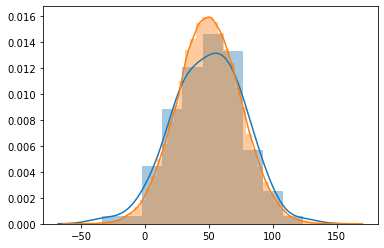

In [55]:
sns.distplot(sampleData)
sns.distplot(populationData)

Ttest_1sample(sampleData, np.mean(populationData)).runTest()

{'t': 9.916214063558781,
 'p-value': 1.6664432534924804e-16,
 'statSig': True,
 'sampleMean': 80.49008435984435,
 'populationMean': 49.93133366329856,
 'meanDiff': 30.558750696545786}

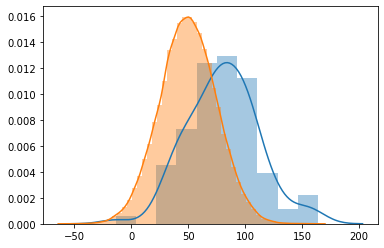

In [56]:
sampleData2 = np.random.normal(loc = 80 , scale = 30, size = 100)

sns.distplot(sampleData2)
sns.distplot(populationData)

Ttest_1sample(sampleData2, np.mean(populationData)).runTest()